<a id=top-page></a>
# `pykitPIV` demo: Model out-of-plane movement of particles

In this Jupyter notebook, we model particles that fall out of the laser plane and therefore lose brightness.

<div class="alert alert-block alert-info" style="margin-top: 20px">
<font size="3"><strong>Table of contents:</strong></font>
<br>
<ol>
    <li><a href="#generate-particles">Generate particles</a></li>
    <li><a href="#generate-velocity-field">Generate random velocity field to advect the particles</a></li>
    <li><a href="#add-movement">Add movement to particles</a></li>
        <ul>
        <li><a href="#update-loss-gain">Update the loss/gain</a></li>
        <li><a href="#add-movement-visualize">Visualize the PIV image pair</a></li>
        </ul>
</ol>
<p></p>
</div>
<br>

***

In [1]:
import numpy as np
import cmcrameri.cm as cmc
from pykitPIV import Particle, FlowField, Motion, Image

2025-05-27 15:16:13.772119: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
save_images = False
filename = None

In [3]:
n_images = 10
image_size = (50, 100)
size_buffer = 1
origin = 'lower'
figsize = (5,5)

<a id=generate-particles></a>
***

## Generate particles

[Go to the top](#top-page)

In [4]:
particles = Particle(n_images, 
                     size=image_size, 
                     size_buffer=size_buffer,
                     diameters=(1,10),
                     distances=(1,2),
                     densities=(0.01,0.01),
                     diameter_std=(0, 0),
                     seeding_mode='random', 
                     random_seed=100)

In [5]:
image = Image(random_seed=100)

In [6]:
image.add_particles(particles)

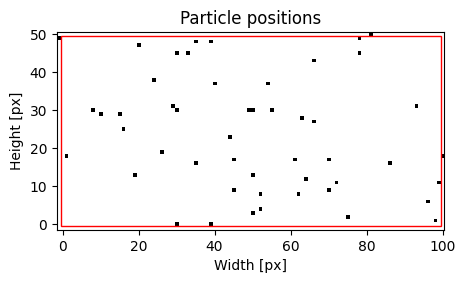

In [7]:
if save_images: filename = 'particle-positions.png'
image.plot(0, 
           with_buffer=True,
           xlabel='Width [px]',
           ylabel='Height [px]',
           title='Particle positions',
           cmap='Greys',
           origin=origin,
           figsize=figsize, 
           filename=filename);

In [8]:
image.add_reflected_light(exposures=(0.99,0.99),
                          maximum_intensity=2**16-1,
                          laser_beam_thickness=1,
                          laser_over_exposure=1,
                          laser_beam_shape=0.95,
                          alpha=1/20)

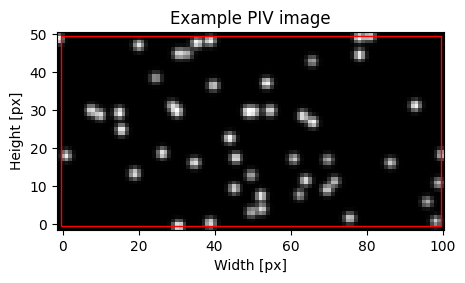

In [9]:
if save_images: filename = 'example-image.png'
image.plot(0, 
           with_buffer=True,
           xlabel='Width [px]',
           ylabel='Height [px]',
           title='Example PIV image',
           cmap='Greys_r',
           origin=origin,
           figsize=figsize, 
           filename=filename);

In [10]:
particles.diameter_per_image

array([5.89064448, 3.50532447, 4.82065832, 8.60298519, 1.04246971,
       2.09412209, 7.03674176, 8.4326748 , 2.23035931, 6.17583996])

<a id=generate-velocity-field></a>
***

## Generate random velocity field to advect the particles

[Go to the top](#top-page)

In [11]:
flowfield = FlowField(n_images,
                      size=image_size,
                      size_buffer=size_buffer,
                      time_separation=0.1,
                      random_seed=100)

In [12]:
flowfield.generate_random_velocity_field(gaussian_filters=(10,11),
                                         n_gaussian_filter_iter=20,
                                         displacement=(0,10))

In [13]:
image.add_flowfield(flowfield)

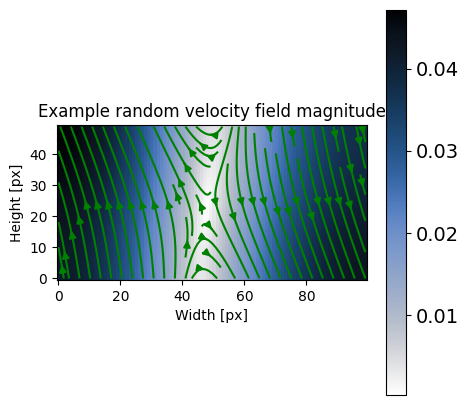

In [14]:
if save_images: filename = 'example-random-velocity-field-magnitude-streamplot.png'
image.plot_field_magnitude(4,
                           with_buffer=False,
                           add_streamplot=True,
                           streamplot_density=1,
                           streamplot_color='g',
                           xlabel='Width [px]',
                           ylabel='Height [px]',
                           title='Example random velocity field magnitude',
                           cmap=cmc.oslo_r,
                           figsize=figsize,
                           filename=filename);

<a id=add-movement></a>
***

## Add movement to particles

[Go to the top](#top-page)

In [15]:
motion = Motion(particles,
                flowfield,
                particle_loss=10.1,
                particle_gain=0.1,
                verbose=True,
                random_seed=100)

In [16]:
motion.loss_percentage_per_image

array([10.1, 10.1, 10.1, 10.1, 10.1, 10.1, 10.1, 10.1, 10.1, 10.1])

In [17]:
motion.gain_percentage_per_image

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [18]:
motion.forward_euler(n_steps=10)

Image 1:	5 particles lost
Image 1:	0 particles added
Image 2:	5 particles lost
Image 2:	0 particles added
Image 3:	4 particles lost
Image 3:	0 particles added
Image 4:	5 particles lost
Image 4:	0 particles added
Image 5:	5 particles lost
Image 5:	0 particles added
Image 6:	5 particles lost
Image 6:	0 particles added
Image 7:	5 particles lost
Image 7:	0 particles added
Image 8:	5 particles lost
Image 8:	0 particles added
Image 9:	5 particles lost
Image 9:	0 particles added
Image 10:	5 particles lost
Image 10:	0 particles added


In [19]:
image_idx = 3

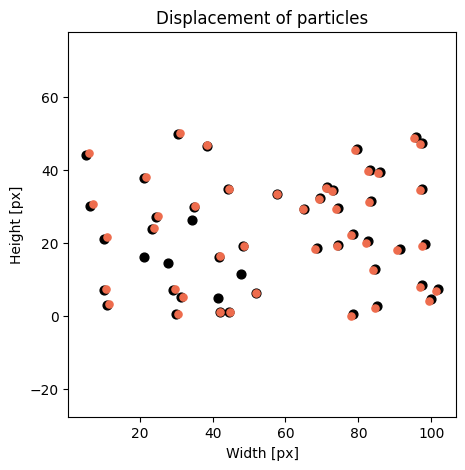

In [20]:
if save_images: filename = 'particle-displacement-1.png'
motion.plot_particle_motion(image_idx,
                            s=40,
                            xlabel='Width [px]',
                            ylabel='Height [px]',
                            title='Displacement of particles',
                            figsize=figsize,
                            filename=filename);

<a id=update-loss-gain></a>

### Update the loss/gain

[Go to the top](#top-page)

In [21]:
motion.particle_loss = (20,80)

In [22]:
motion.particle_gain = (10,10)

In [23]:
motion.forward_euler(n_steps=10)

Image 1:	13 particles lost
Image 1:	5 particles added
Image 2:	21 particles lost
Image 2:	5 particles added
Image 3:	21 particles lost
Image 3:	4 particles added
Image 4:	29 particles lost
Image 4:	5 particles added
Image 5:	17 particles lost
Image 5:	5 particles added
Image 6:	29 particles lost
Image 6:	5 particles added
Image 7:	12 particles lost
Image 7:	5 particles added
Image 8:	27 particles lost
Image 8:	5 particles added
Image 9:	13 particles lost
Image 9:	5 particles added
Image 10:	26 particles lost
Image 10:	5 particles added


In [24]:
image_idx = 3

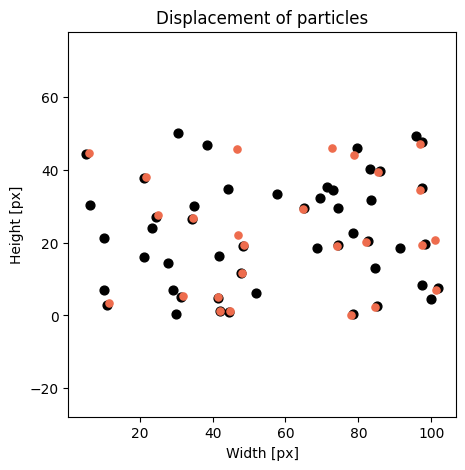

In [25]:
if save_images: filename = 'particle-displacement-1.png'
motion.plot_particle_motion(image_idx,
                            s=40,
                            xlabel='Width [px]',
                            ylabel='Height [px]',
                            title='Displacement of particles',
                            figsize=figsize,
                            filename=filename);

<a id=add-movement-visualize></a>

### Visualize the PIV image pair

[Go to the top](#top-page)

In [26]:
image.add_motion(motion)

In [27]:
image.add_reflected_light(exposures=(0.99,0.99),
                          maximum_intensity=2**16-1,
                          laser_beam_thickness=1,
                          laser_over_exposure=1,
                          laser_beam_shape=0.95,
                          alpha=1/10)

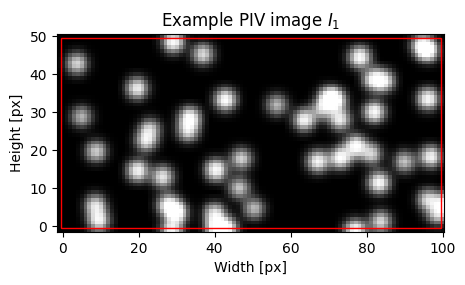

In [28]:
if save_images: filename = 'example-image-I1-with-buffer.png'
image.plot(image_idx, 
           instance=1,
           with_buffer=True,
           xlabel='Width [px]',
           ylabel='Height [px]',
           title='Example PIV image $I_1$',
           cmap='Greys_r',
           origin=origin,
           figsize=figsize, 
           filename=filename);

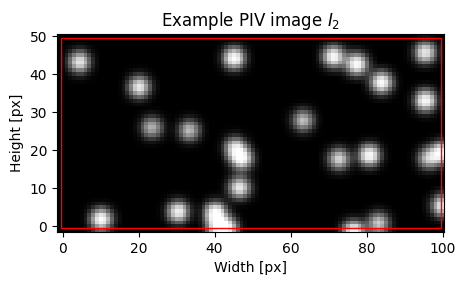

In [29]:
if save_images: filename = 'example-image-I2-with-buffer.png'
image.plot(image_idx, 
           instance=2,
           with_buffer=True,
           xlabel='Width [px]',
           ylabel='Height [px]',
           title='Example PIV image $I_2$',
           cmap='Greys_r',
           origin=origin,
           figsize=figsize, 
           filename=filename);

MovieWriter ffmpeg unavailable; using Pillow instead.


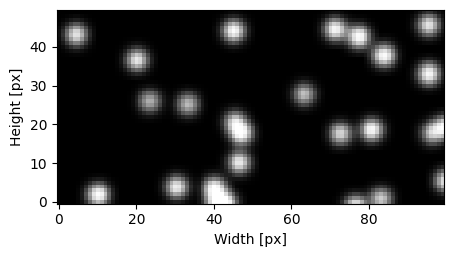

In [30]:
image.animate_image_pair(image_idx, 
                         with_buffer=False, 
                         xlabel='Width [px]',
                         ylabel='Height [px]',
                         title=None, 
                         cmap='Greys_r', 
                         origin=origin,
                         figsize=(5, 5), 
                         dpi=300, 
                         filename='animated-images.gif')

***

© K. Zdybał, C. Mucignat, S. Kunz, I. Lunati (2025)